# Aprendizaje No Supervisado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [2]:
data = pd.read_excel("../Datasets/HVAC.xlsx", "HISTORICO_DATOS", index_col=0)

In [3]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS",
                        "C_O_P_ INSTALACIÓN GRUPO FRÍO 1", "C_O_P_ INSTALACÍON GRUPO FRÍO 2",
                        "ORDEN", "VÁLVULA BY PASS SECUNDARIO FRÍO",
                        "TEMPERATURA CONTROL DE BY PASS SECUNDARIO", "SECUNDARIO FRÍO 1",
                        "SECUNDARIO FRÍO 2", "SECUNDARIO FRÍO 3", "MODO INVIERNO BC1", 
                        "MODO INVIERNO BC2", "PERIODO P6", "CONTROL CALOR", 
                        "CAPACIDAD BOMBA CALOR FELIPE %", "CAPACIDAD BOMBA CALOR CARLOS %",
                        "CAPACIDAD GRUPO DE FRÍO 1"," CAPACIDAD GRUPO DE FRÍO 2",
                        "IMPULSIÓN SECUNDARIO CALOR", "SECUNDARIO CALOR 1", 
                        "SECUNDARIO CALOR 2", "SECUNDARIO CALOR 3",
                        "Fecha- hora de lectura"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]

In [4]:
data3 = data2
data3["POTENCIA TERMICA BOMBA CALOR CARLOS"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS"] * 0.001163
data3["POTENCIA TERMICA BOMBA CALOR FELIPE"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 1"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 2"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2"] * 0.001163

C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

## Método Codo

In [5]:
def metodoCodo(X):
    from sklearn.cluster import KMeans
    plt.figure(figsize=(10, 8))
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 15), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

## Grafica clusters

In [6]:
def graph_clusters(data, centroides):
    X = np.array(data)
    # Predicting the clusters
    labels = kmeans.predict(data)
    colores = ['tomato','green','cyan','yellow']
    asignar = []
    for row in labels:
        asignar.append(colores[row])
    fig = plt.figure(figsize=(10,5))
    ax = Axes3D(fig)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s=1)
    ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], marker='*', c='black', s=1500)

## C_O_P Carlos

In [8]:
dataCarlos = data3[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS']]
dataCarlos.describe()

,POTENCIA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.616413,132.154739,15.083257,29.447289
std,43.907480,149.917857,11.345877,13.676912
min,0.000000,0.000000,-1.400000,0.000000
25%,0.480000,9.877769,6.968000,16.940001
50%,0.500000,46.868723,13.353139,34.740002
75%,67.599998,255.914298,23.717333,42.450001
max,164.206665,592.614391,43.799999,47.889999


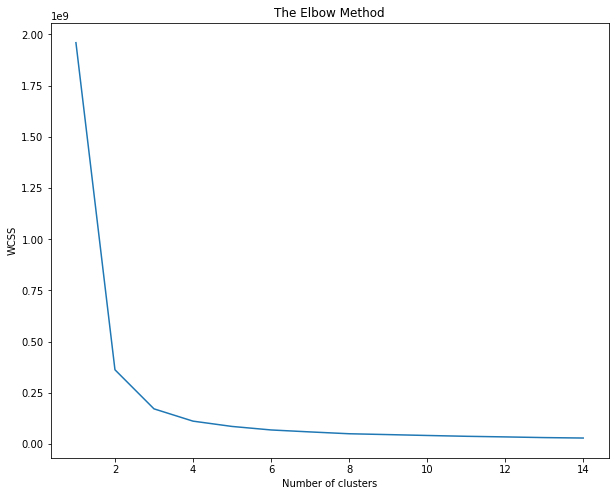

In [9]:
metodoCodo(dataCarlos)

In [10]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataCarlos)
centroids = kmeans.cluster_centers_
centroids

array([[ 42.00612317, 170.94135464,  14.24110558,  32.21427699],
       [ 82.91446833, 303.1565788 ,  14.83530773,  35.12238373],
       [  2.37224954,  21.60762405,  15.936854  ,  25.7154704 ],
       [122.38879825, 439.61603317,  11.40638905,  37.88356738]])

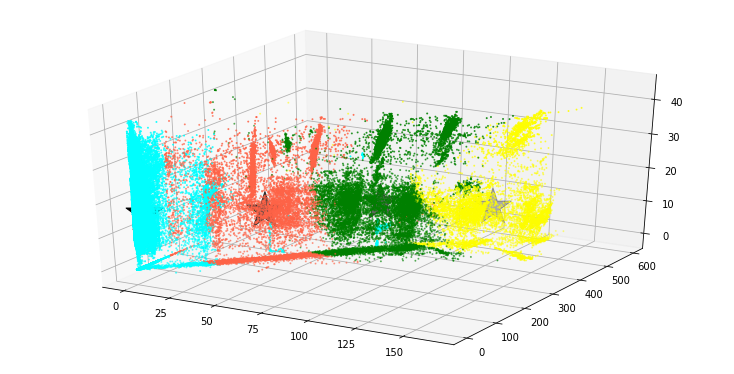

In [11]:
graph_clusters(dataCarlos, centroids)

### Silhouette Coefficient

A higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

    a: The mean distance between a sample and all other points in the same class.
    b: The mean distance between a sample and all other points in the next nearest cluster.
    s = (b-a) / max(a,b)
    
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

In [12]:
labels = kmeans.labels_
metrics.silhouette_score(dataCarlos, labels, metric='euclidean')

0.6481423012974509

In [13]:
# Sum of Squared Error (SSE)
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

111836123.6293169

## C_O_P Felipe

In [14]:
dataFelipe = data3[['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR FELIPE']]
dataFelipe.describe()

,POTENCIA BOMBA CALOR FELIPE,POTENCIA TERMICA BOMBA CALOR FELIPE,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR FELIPE
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,32.952675,114.991659,15.083257,27.899720
std,45.304465,145.959139,11.345877,13.937344
min,0.000000,0.000000,-1.400000,0.000000
25%,0.640000,4.233283,6.968000,14.794000
50%,0.700000,24.492828,13.353139,28.799999
75%,66.543999,227.389796,23.717333,41.980000
max,157.706665,592.815954,43.799999,47.889999


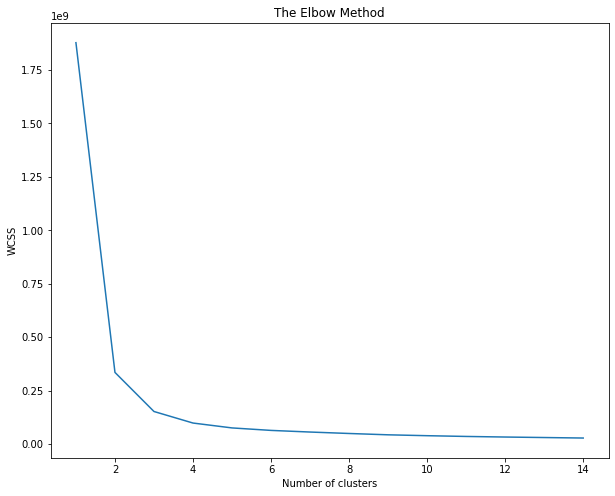

In [15]:
metodoCodo(dataFelipe)

In [16]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataFelipe)
centroids = kmeans.cluster_centers_
centroids

array([[  3.37467626,  13.42557163,  15.38685307,  25.25914181],
       [ 83.99786975, 287.19622152,  15.4244711 ,  32.07671255],
       [ 39.25044504, 155.33425469,  15.266913  ,  30.51751743],
       [126.65515944, 417.84370014,  12.5789159 ,  34.24875344]])

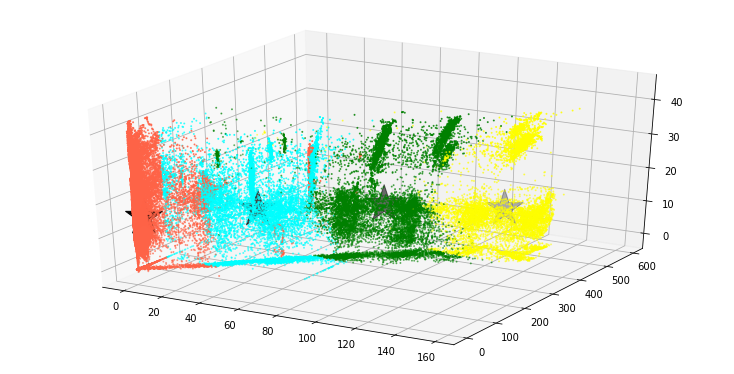

In [17]:
graph_clusters(dataFelipe, centroids)

In [18]:
labels = kmeans.labels_
metrics.silhouette_score(dataFelipe, labels, metric='euclidean')

0.6669751671315166

In [19]:
# Sum of Squared Error (SSE)
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

97996968.36859517

## C_O_P Grupo Frío 1

In [20]:
dataFrio1 = data3[['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR']]
dataFrio1.describe()

,POTENCIA GRUPO FRÍO 1,POTENCIA TERMICA GRUPO FRIO 1,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000
mean,20.509645,95.445736,15.083257
std,26.984676,117.950837,11.345877
min,0.000000,0.000000,-1.400000
25%,0.100000,0.000000,6.968000
50%,0.100000,22.504057,13.353139
75%,38.900002,172.589200,23.717333
max,115.366669,2373.624850,43.799999


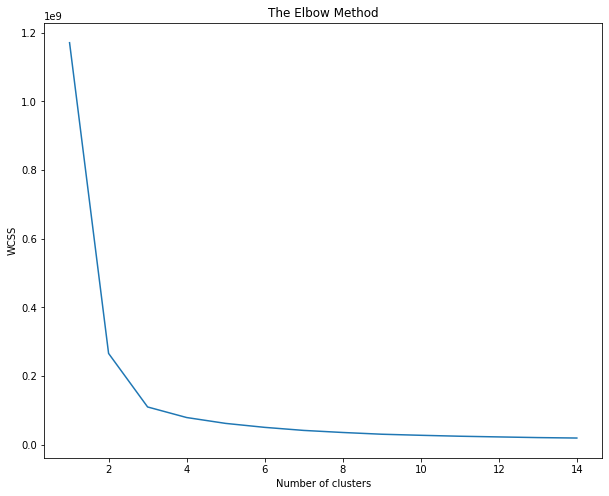

In [21]:
metodoCodo(dataFrio1)

In [22]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataFrio1)
centroids = kmeans.cluster_centers_
centroids

array([[  5.55629485,  10.78812501,  14.56286705],
       [ 26.67521818, 143.71482104,  12.71599608],
       [ 69.34203055, 343.66321786,  22.0668587 ],
       [ 46.48459318, 244.49353531,  15.75582248]])

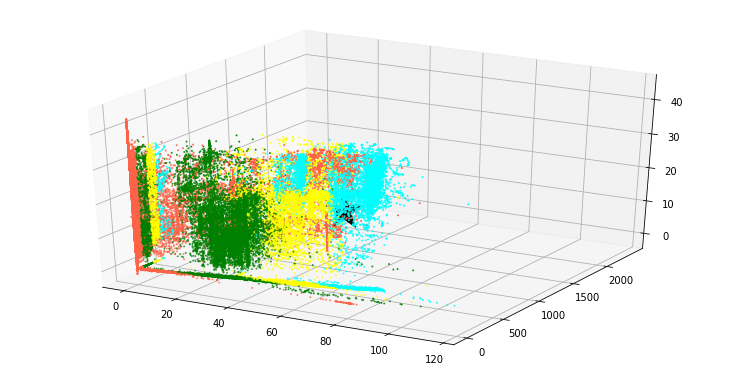

In [23]:
graph_clusters(dataFrio1, centroids)

In [24]:
labels = kmeans.labels_
metrics.silhouette_score(dataFrio1, labels, metric='euclidean')

0.6583499612296253

In [25]:
# Sum of Squared Error (SSE)
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

79667752.1258479

## C_O_P Grupo Frío 2

In [26]:
dataFrio2 = data3[['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR']]
dataFrio2.describe()

,POTENCIA GRUPO FRÍO 2,POTENCIA TERMICA GRUPO FRIO 2,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000
mean,27.022629,97.791279,15.083257
std,28.751257,117.645826,11.345877
min,0.000000,0.000000,-1.400000
25%,0.100000,0.000000,6.968000
50%,24.876667,28.784257,13.353139
75%,52.560001,165.611200,23.717333
max,93.536667,412.806886,43.799999


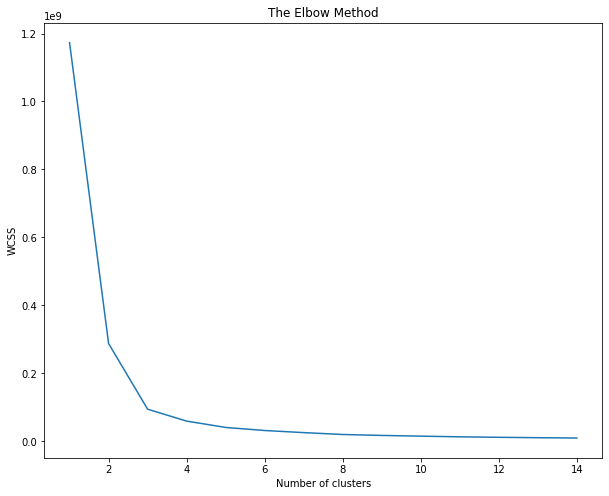

In [27]:
metodoCodo(dataFrio2)

In [28]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataFrio2)
centroids = kmeans.cluster_centers_
centroids

array([[  4.25929617,   1.81764043,  13.19017812],
       [ 71.09247767, 325.87391166,  21.65054931],
       [ 39.94316405, 123.36865671,  14.91832667],
       [ 53.92737424, 227.03732681,  16.7065307 ]])

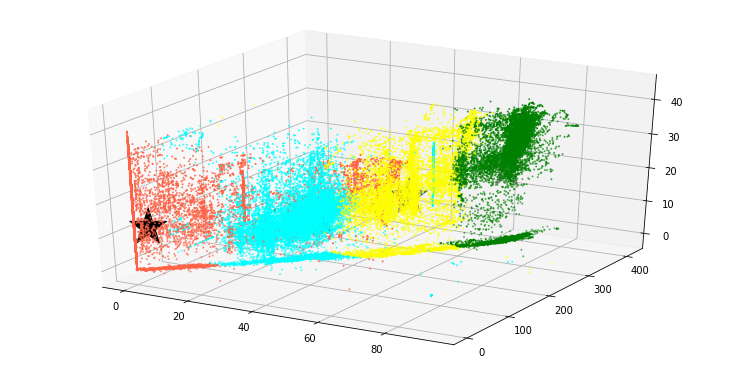

In [29]:
graph_clusters(dataFrio2, centroids)

In [30]:
labels = kmeans.labels_
metrics.silhouette_score(dataFrio2, labels, metric='euclidean')

0.698324139455221

In [31]:
# Sum of Squared Error (SSE)
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

59325786.54999523